# Import Libraries

In [34]:
import numpy as np
from sklearn.cluster import KMeans 
import csv
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from utils import Utility

# Load and Analyse Data

In [35]:
utils = Utility()
news_data = utils.load_data('Data/bbc-text.csv')
news_data = shuffle(news_data)
news_data.reset_index(inplace=True, drop=True)

In [ ]:
news_data.head()

,category,text
0,entertainment,top stars join us tsunami tv show brad pitt r...
1,business,consumer spending lifts us growth us economic ...
2,entertainment,top gig award for scissor sisters new york ban...
3,tech,bush website blocked outside us surfers outsid...
4,politics,labour faces cold calls inquiry labour is to...


In [ ]:
news_data.tail()

,category,text
2220,sport,kirwan demands italy consistency italy coach j...
2221,politics,ex-pm lord callaghan dies aged 92 former labou...
2222,business,us insurer marsh cuts 2 500 jobs up to 2 500 j...
2223,business,economy stronger than forecast the uk econom...
2224,politics,schools to take part in mock poll record numbe...


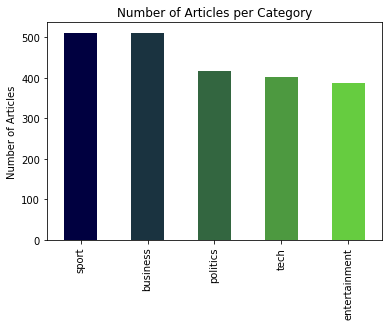

In [ ]:
colors = [(x/10.0, x/5.0, 0.25) for x in range(5)] 
news_data.category.value_counts().plot(kind='bar',color=colors)
plt.title('Number of Articles per Category')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
print('Total categories: ' + str(np.unique(news_data['category'])))
print('Total number of news articles: ' + str(len(news_data['text'])))
news_data.describe()

Total categories: ['business' 'entertainment' 'politics' 'sport' 'tech']
Total number of news articles: 2225


,category,text
count,2225,2225
unique,5,2126
top,sport,britons fed up with net service a survey condu...
freq,511,2


# Data Preprocessing

In [36]:
news_data['text_filtered']= None
for i in range(2225):
    text = str(news_data['text'][i])
    text = utils.remove_bad_chars(text)
    text = utils.remove_non_eng_words(text)
    news_data['text_filtered'][i] = str(text)

In [ ]:
news_data.head(4)

,category,text,text_filtered
0,entertainment,top stars join us tsunami tv show brad pitt r...,top stars join us tsunami tv show brad pitt r...
1,business,consumer spending lifts us growth us economic ...,consumer spending lifts us growth us economic ...
2,entertainment,top gig award for scissor sisters new york ban...,top gig award for scissor sisters new york ban...
3,tech,bush website blocked outside us surfers outsid...,bush website blocked outside us surfers outsid...


# Count-Vectorization

In [37]:
count_vec = utils.get_CountVector(news_data.text_filtered)

In [51]:
count_vec.head(10)

,aa,abacus,abandon,abandoned,abandonment,abate,abatement,abbas,abbasi,abbey,abbot,abdication,abdomen,abdominal,abduction,aberration,abeyance,abhorrent,abide,abiding,abigail,ability,able,abnormal,abnormality,abolish,abolition,aborted,abortion,abortionist,abortive,abroad,abruptly,absence,absent,absentee,absolute,absolutely,absolution,absorb,...,year,yearlong,yearly,yearning,yelling,yellow,yen,yeo,yes,yesterday,yesteryear,yield,ym,yoga,yore,york,yorker,young,younger,youngster,youth,youthful,yuan,zander,zar,zeal,zed,zenith,zephyr,zeppelin,zero,zeta,zimbabwe,zinc,zip,zodiac,zombie,zone,zoom,zorro
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,3,0,0,...,1,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Find number of clusters using Elbow-method

1 608589.8112359538
2 591154.3978349272
3 575503.072604626
4 567229.3126011026
5 559162.6008377055
6 551109.2783848486
7 546264.8351787279
8 540256.4038690319
9 532728.3953437904
10 527859.6555102647


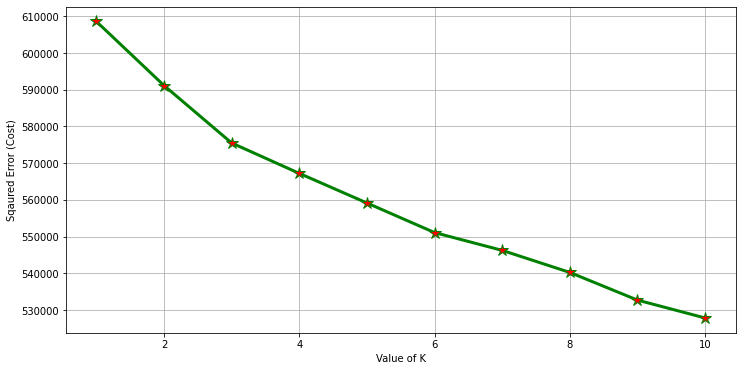

In [61]:
cost = []

for k in range(1,11):
    kmeanModel= KMeans(n_clusters=k,n_init=30,max_iter=200) 
    kmeanModel.fit(count_vec)
    cost.append(kmeanModel.inertia_) 
    print(k,cost[k-1])
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11), cost, linewidth=3, color="Green", marker ="*", markerfacecolor="Red", markerfacecoloralt="Red", markersize=12) 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()

# Clustering

In [62]:
K = 5
kmeanModel= KMeans(n_clusters=K,verbose=0,n_init=30,max_iter=300)
kmeanModel.fit(count_vec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
y_pred = kmeanModel.predict(count_vec)  

In [55]:
tsne = TSNE(n_components=2, perplexity=100,learning_rate=100.0,n_iter=700, metric='euclidean', verbose=1)
tsne_results = tsne.fit_transform(count_vec)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2225 samples in 3.460s...
[t-SNE] Computed neighbors for 2225 samples in 141.505s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2225
[t-SNE] Computed conditional probabilities for sample 2000 / 2225
[t-SNE] Computed conditional probabilities for sample 2225 / 2225
[t-SNE] Mean sigma: 3.792156
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.897812
[t-SNE] KL divergence after 700 iterations: 1.921969


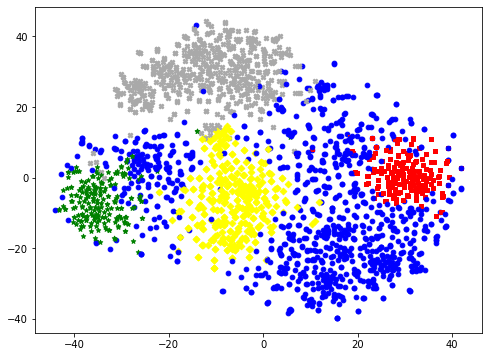

In [ ]:
clr = ['Blue','Green','Red','Darkgray','Yellow']
markers = ['o','*','s','X','D']
area = np.pi*7
plt.figure(figsize=(8,6))
for i in range(tsne_results.shape[0]):
    X = tsne_results[:,0][i]
    Y = tsne_results[:,1][i]
    plt.scatter(X, Y, s=area, color=clr[y_pred[i]], marker=markers[y_pred[i]])
plt.show()

# Result Analysis

In [67]:
accuracy = 0
for i in range(K):
    temp_df = news_data[news_data['cluster'] == i]
    cat_mode = stats.mode(np.array(temp_df.category))
    #print(cat_mode.mode[0],cat_mode.count[0],len(temp_df.category))
    accuracy = accuracy + (cat_mode.count[0]/len(temp_df.category))
print('Accuracy (Method 1) : '+str(round((accuracy/5)*100,2))+'%')     

accuracy2 = 0
category = ['entertainment','sport','tech','business','politics']
for i in category:
    temp_df = news_data[news_data['category'] == i]
    cat_mode = stats.mode(np.array(temp_df.cluster))
    #print(cat_mode.mode[0],cat_mode.count[0],len(temp_df.cluster))
    accuracy2 = accuracy2 + (cat_mode.count[0]/len(temp_df.cluster))  
print('Accuracy (Method 2) : '+str(round((accuracy2/5)*100,2))+'%')     
print('Final Accuracy : '+str(round(((accuracy+accuracy2)/10)*100,2))+'%')        

Accuracy (Method 1) : 77.43%
Accuracy (Method 2) : 75.52%
Final Accuracy : 76.47%
